IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

IMPORTING DATASET

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

IMPLEMENTING THE THOMPSON SAMPLING

In [3]:
import random

N = 10000
d = 10
ads_selected = []

number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
total_reward = 0

for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(number_of_rewards_1[i] + 1, number_of_rewards_0[i] + 1)
    if random_beta > max_random:
      max_random = random_beta
      ad = i

    ads_selected.append(ad)
    reward = dataset.values[n, ad]
  if reward == 1:
    number_of_rewards_1[ad] = number_of_rewards_1[ad] + 1
  else:
    number_of_rewards_0[ad] = number_of_rewards_0[ad] + 1

  total_reward = total_reward + reward

VISUALISING THE RESULT

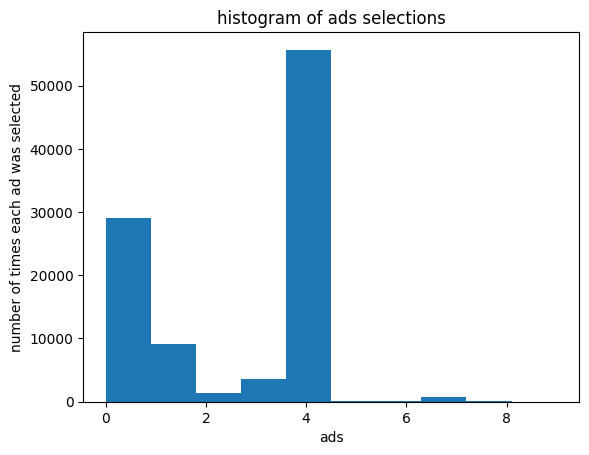

In [4]:
plt.hist(ads_selected)
plt.title('histogram of ads selections')
plt.xlabel('ads')
plt.ylabel('number of times each ad was selected')
plt.show()